# Measuring Performance in Classification Models
This notebook covers the basic measurement methods for logistic regression moodels

**Class-probability based metrics**
* Log-likelihood
* Gini
* Entropy

**Accuracy-based metrics**
* Accuracy
* Misclassification rate (= 1-accuracy),
* Cohen’s Kappa (adjusts for class imbalance)

**Accuracy for specific classes**
* Sensitivity and Specificity (distinguishes types of error for binary outcomes)

**Area under the ROC curve (AUC)**

**Additional Diagnostic Tool**
* Confusion Matrix


## Class-probability based metrics
* Log-likelihood
* Gini
* Entropy

### Log-likelihood
**Theoretical Explanation:** 
Log-likelihood is a measure of the probability of observing the given data under a specific model. In the context of classification, it assesses how probable the observed class labels are, given the predicted probabilities from the model.

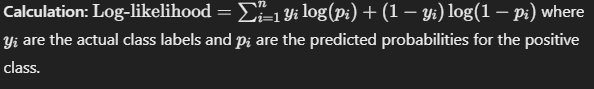

**Benefits:**
- Provides a direct measure of model fit to the data.
- Penalizes probabilities that are confidently wrong, encouraging well-calibrated predictions.

**Drawbacks:**
- Can be overly sensitive to mispredictions with high confidence.
- Not as intuitive as other metrics like accuracy or AUC.

In [1]:
import numpy as np
from sklearn.metrics import log_loss

# Actual and predicted labels
y_true = [0, 1, 0, 1]
y_pred_probs = [0.1, 0.9, 0.2, 0.8]  # Predicted probabilities for the positive class

# Calculate log-loss (negative log-likelihood)
log_likelihood_score = log_loss(y_true, y_pred_probs)
print("Log-likelihood (Log Loss):", log_likelihood_score)

Log-likelihood (Log Loss): 0.164252033486018


### Gini Coefficient
**Theoretical Explanation:** 
The Gini coefficient is a measure derived from the Lorenz curve, often used to quantify inequality or concentration. In classification, it measures the inequality among values of a frequency distribution (such as levels of income). For model performance, it reflects the discriminatory power of the model.

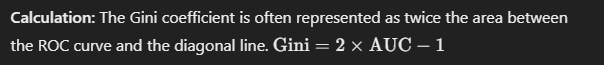


**Benefits:**
* Reflects model’s ability to discriminate between the positive and negative classes.
* More sensitive to the ranking of predicted probabilities than simple accuracy.

**Drawbacks:**
* Less intuitive than direct accuracy or AUC measurements.
* Dependent on the AUC, thus inherits any limitations of the ROC curve analysis.

**Lorenz Curve and Gini Coefficient**

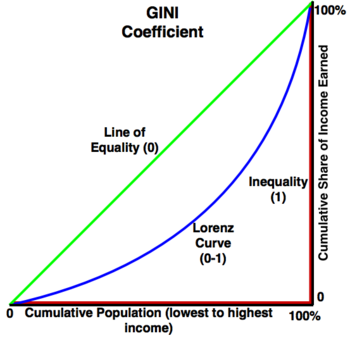

Image Source: Energy Education: Created internally by a member of the Energy Education team. https://energyeducation.ca/encyclopedia/Gini_coefficient#cite_note-1

- The Lorenz Curve is a graphical representation used to show the distribution of income or wealth within a population. It was originally developed to depict inequality and concentration in economics. The curve plots the cumulative percentages of the total income or wealth of the population (y-axis) against the cumulative percentage of the population (x-axis), starting with the poorest individual or household.

**Key Points of the Lorenz Curve**
* The line at 45 degrees represents perfect equality, where each percentage of the population earns exactly the same percentage of the total income.
* The more the Lorenz Curve bows away from the line of equality, the greater the inequality.

**Gini Coefficient**
* The Gini Coefficient quantifies this inequality and is calculated as the area between the line of perfect equality and the Lorenz Curve, normalized to be between 0 and 1 (or sometimes multiplied by 100 for a percentage). ***A Gini Coefficient of 0 signifies perfect equality (everyone has the same wealth), whereas a Gini of 1 indicates maximal inequality (one person has all the wealth).***

**Gini Coefficient in Classification**
- In the context of classification, particularly in machine learning, the Gini Coefficient is used as a measure of a model's ability to discriminate between classes. This usage, while conceptually similar, is calculated differently from its economic counterpart.

**Calculation**

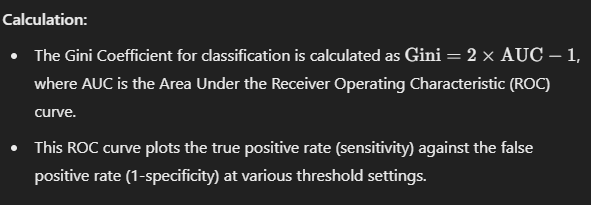

**Discriminatory Power**
- The Gini Coefficient in this context measures how well the model can distinguish between the classes.
- A higher Gini Coefficient indicates a model that better discriminates between positive and negative classes. An AUC of 1 (perfect model) translates to a Gini of 1, whereas an AUC of 0.5 (no better than random) results in a Gini of 0.

**Example**
- Let’s say you have a binary classification model that predicts whether a credit card transaction is fraudulent. The model assigns a probability score to each transaction:

    * Transaction Data: Assume you have 100 transactions, 10 of which are fraudulent.
    * Model Scores: The model assigns higher scores to transactions it predicts as more likely to be fraudulent.

- ROC Curve Analysis:
    * As you adjust the threshold for classifying a transaction as fraudulent, you plot the ROC curve based on true positive rates and false positive rates at each threshold.

- Gini Coefficient:
    * Calculate the AUC from this ROC curve.
    * Use the AUC to calculate the Gini Coefficient. If the AUC is, say, 0.85, then Gini=2×0.85−1=0.7.
- Interpretation:
    * A Gini Coefficient of 0.7 indicates a strong ability to discriminate between fraudulent and non-fraudulent transactions, much better than a random guess (Gini of 0).

In [2]:
#Code Example for Gini COefficient
from sklearn.metrics import roc_auc_score

# Actual and predicted labels
y_true = [0, 1, 0, 1]
y_pred_probs = [0.1, 0.9, 0.2, 0.8]  # Predicted probabilities for the positive class

# Calculate AUC
auc_score = roc_auc_score(y_true, y_pred_probs)

# Convert AUC to Gini
gini_score = 2 * auc_score - 1
print("Gini Coefficient:", gini_score)

Gini Coefficient: 1.0


## Entropy

**Theoretical Explanation:**
- Entropy in the context of classification is a measure of impurity or disorder. It quantifies the amount of uncertainty involved in predicting the class labels of a dataset.
- Entropy in information theory, often used in the field of machine learning, particularly in decision tree algorithms, is a measure of the unpredictability or the randomness of a data set. 
- In the context of classification, entropy is used to quantify the impurity or disorder within a set of elements, which in this case are the class labels of the data points.

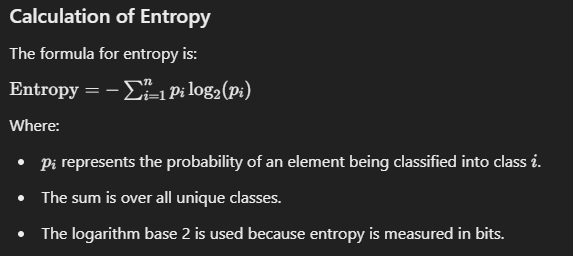

**Implications of Entropy Values**
- **High Entropy:** Indicates high disorder or impurity within a dataset. If entropy is high, it suggests that the dataset contains a more equal mix of classes, making it harder to predict the outcome of a new data point accurately because there is significant overlap in the characteristics of different classes. This implies that the model’s predictive performance could be lower due to this inherent uncertainty.

- **Low Entropy:** Indicates low disorder or high purity. A low entropy value suggests that a dataset (or subset of data in the context of decision trees) is dominated by one class, making it easier to predict the outcome. For example, if in a node of a decision tree all or most of the data points belong to one class, the entropy would be near zero, suggesting no uncertainty or impurity.

**Entropy and Accuracy**
- **Certainty vs. Accuracy:** While low entropy implies a high level of certainty or predictability in assigning class labels, ***it doesn't guarantee that these labels are correct.*** Accuracy, which measures the proportion of true results (both true positives and true negatives) among the total number of cases examined, is not directly inferred from entropy.

- **Model Correctness:** The correctness or accuracy of the predictions depends on the quality of the model, the appropriateness of the features used, the training process, and how well the model generalizes from training data to unseen data. ***Even if a model is very certain about its classifications (low entropy in predictions), if the model is not well-tuned, trained on biased data, or based on inadequate features, its predictions might still be incorrect.***

**Benefits:**
* Measure of Uncertainty: Entropy effectively measures how much information is needed to describe the randomness or uncertainty in the dataset's class labels.
* Utility in Decision Trees: It is particularly useful in building decision trees (e.g., the ID3 algorithm), where it is used to choose the best attribute that yields the most predictable subsets (highest information gain).

**Drawbacks:**
* Computational Complexity: Calculating entropy can be computationally intensive, especially with large datasets with many classes, because it involves calculating probabilities for each class and their logarithms.
* Abstract Measure: While entropy is a powerful theoretical measure, it can be abstract and less intuitive than direct error measurements like accuracy or F1 score when it comes to understanding model performance directly.



In [3]:
# Code Example of Entropy Calculation
import numpy as np
from scipy.stats import entropy

# Probabilities of belonging to each of three classes
probabilities = [0.7, 0.2, 0.1]  # High probability for class 1

# Calculate entropy
ent = entropy(probabilities, base=2)  # Using base 2 for bits
print(f"Entropy: {ent:.3f} bits")

Entropy: 1.157 bits


## Confusion Matrix

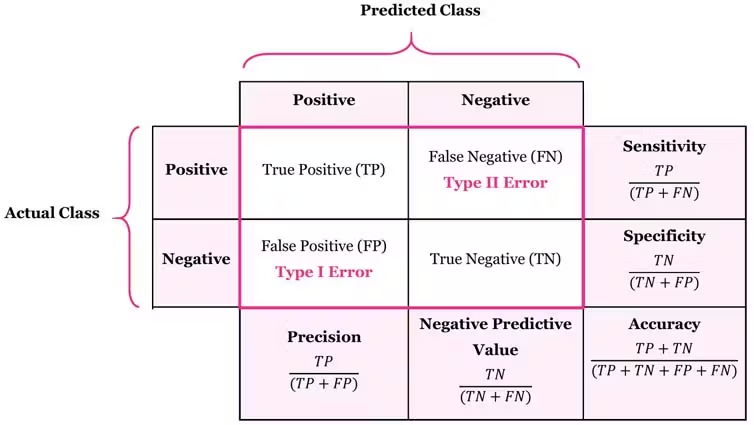

Source: ENCORD https://encord.com/glossary/confusion-matrix/ 

**Theoretical Explanation:** 
- A confusion matrix is a table used to describe the performance of a classification model on a set of data for which the true values are known. It lays out the predictions made by the model versus the actual categories in a format that makes it easy to see when the model is confusing two classes (i.e., mislabeling one as another).

**Components of a Confusion Matrix for Binary Classification:**
True Positives (TP): Correct predictions of the positive class.
True Negatives (TN): Correct predictions of the negative class.
False Positives (FP): Incorrect predictions as positive that are actually negative.
False Negatives (FN): Incorrect predictions as negative that are actually positive.

**Benefits:**
* Provides a detailed breakdown of correct and incorrect classifications.
* Helps in understanding the model's performance across different classes.

**Drawbacks:**
* More difficult to interpret quickly compared to single metric scores like accuracy.
* Does not provide insights into the probabilistic or decision function aspects of classifier performance.



In [4]:
#Code Example to generate a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   9]
 [ 22 113]]


### Metrics Derived from the Confusion Matrix

1. Accuracy
**Theoretical Explanation:** 
- Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined.

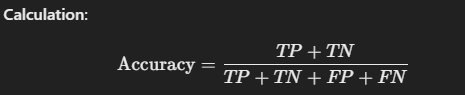

- Benefits: Easy to understand; gives a quick snapshot of model performance.
- Drawbacks: Can be misleading in unbalanced datasets where one class dominates.

2. Misclassification Rate
**Theoretical Explanation:** 
- The proportion of incorrect predictions among the total number of cases.

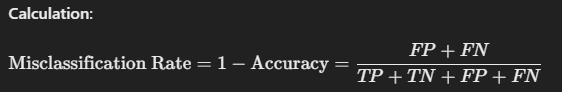

- Benefits: Directly highlights the rate of wrong predictions.
- Drawbacks: Same as accuracy, less useful in imbalanced datasets.

3. Sensitivity (Recall or True Positive Rate)
**Theoretical Explanation:** 
- Measures the proportion of actual positives that are correctly identified.

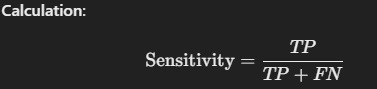

- Benefits: Crucial for models where missing positive cases is costly (e.g., disease screening).
- Drawbacks: Does not consider false positives.

4. Specificity
**Theoretical Explanation:** 
- Measures the proportion of actual negatives that are correctly identified.

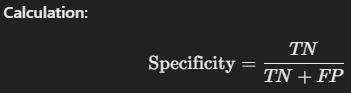

- Benefits: Important for models where false alarms are costly.
- Drawbacks: Does not consider false negatives.

5. Precision (Positive Predictive Value)
**Theoretical Explanation:** 
- Precision measures the accuracy of the positive predictions. It is the proportion of positive identifications that were actually correct and is particularly important in situations where the cost of a false positive is high.

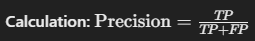

* **Benefits:**
    * Indicates the reliability of the positive predictions made by the model.
    * Useful in contexts where false positives are more problematic than false negatives, such as spam detection.
* **Drawbacks:**
    * Does not take into account false negatives. A model can refuse to label most negatives to increase precision, but this can result in many missed positive cases.

**Type 1 and Type 2 Errors**
**Type I Error (False Positive)**
- Definition: A Type I error occurs when the model incorrectly predicts the positive class, also known as a "false positive." For example, a medical test that incorrectly diagnoses a healthy patient as sick commits a Type I error.

- Implications: Type I errors are critical in fields like medicine or judicial systems where the consequences of falsely identifying an issue (like a disease or crime) can be severe.

**Type II Error (False Negative)**
- Definition: A Type II error occurs when the model fails to detect the positive class, also known as a "false negative." For example, a diagnostic test that fails to detect a condition that is present commits a Type II error.

- Implications: Type II errors are particularly problematic in scenarios like cancer screening or fraud detection, where failing to detect an existing problem can have dire consequences.

**Contextual Importance:**
* ***Sensitivity is directly related to Type II errors***, as it measures the ability to correctly identify positives (thus avoiding false negatives).
* ***Specificity is related to Type I errors***, as it measures the ability to correctly identify negatives (thus avoiding false positives).

**Calculating Type 1 and 2 Errors**

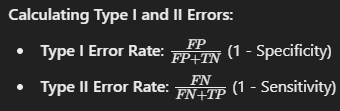

In [6]:
# Code example for accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.88


In [7]:
# Code example for misclassification rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.12


In [9]:
# Extract TP, TN, FP, FN
TP = cm[1, 1]  # True Positive: correctly predicted event values
TN = cm[0, 0]  # True Negative: correctly predicted no-event values
FP = cm[0, 1]  # False Positive: incorrectly predicted event values (Type I error)
FN = cm[1, 0]  # False Negative: incorrectly predicted no-event values (Type II error)

In [10]:
# Code example for sensitivity (recall or true positive rate)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.8444444444444444


In [11]:
# Code example for specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Specificity: 0.9217391304347826


In [12]:
# Code example for precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.926829268292683


## Area under the ROC curve (AUC-ROC)
**Theoretical Explanation:** 
- The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve is a performance measurement for classification problems at various threshold settings. The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It plots the True Positive Rate (TPR, Sensitivity) against the False Positive Rate (FPR, 1 - Specificity) at different threshold levels.

**Calculation:**
- The AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). This metric provides an aggregate measure of performance across all possible classification thresholds. The value of the AUC ranges from 0 to 1, where:
    * 0.5 denotes a model with no discriminative ability (equivalent to random guessing).
    * 1 denotes a perfect model that achieves 100% sensitivity (no false negatives) and 100% specificity (no false positives).

**Benefits:**
* Robustness: AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
* Discrimination: It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.
* Threshold Independence: It is useful as a single measure to summarize the performance of a model across all threshold values, which can be helpful when you need a quick way to compare models.

**Drawbacks:**
* Less Intuitive: The ROC curve and AUC are not as intuitive to understand and interpret, especially for non-technical stakeholders, compared to simpler metrics like accuracy.
* Not Ideal for Imbalanced Classes: In highly imbalanced datasets, ROC AUC might be overly optimistic and not differentiate between the ability of the model to recover different classes.

### Receiver Operating Characteristic (ROC) Curve
**Theoretical Explanation:** 
- The ROC curve is a graphical plot used to show the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR, or Sensitivity) against the False Positive Rate (FPR, or 1 - Specificity) at various threshold settings.

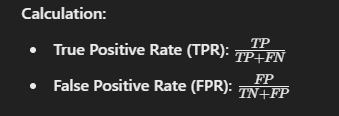

### Threshold in Classification Models
- In binary classification tasks, a model typically outputs a probability or a score indicating the likelihood that a given instance belongs to the positive class. The threshold is a value that determines the point at which a probability score is classified as positive or negative. For example, in a binary classification for disease diagnosis:
    * Probability Score: A logistic regression model might predict a probability of 0.7 that a patient has a particular disease.
    * Threshold: If the threshold is set at 0.5, any probability greater than or equal to 0.5 is classified as 'disease' (positive class), and below 0.5 as 'no disease' (negative class).

**Role of Threshold in ROC Curves**
- The ROC curve illustrates the performance of a classifier without committing to a specific threshold, by showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold settings:
    * True Positive Rate (Sensitivity): The proportion of actual positives correctly identified as such (e.g., the proportion of sick patients correctly diagnosed as sick).
    * False Positive Rate: The proportion of negative instances incorrectly classified as positive (e.g., the proportion of healthy patients incorrectly diagnosed as sick).

**Changing Threshold Levels**
* Increasing the Threshold: Higher thresholds mean the classifier must be more certain before classifying a positive. This typically reduces both false positives and true positives, leading to a lower FPR but also potentially a lower TPR.
* Decreasing the Threshold: Lower thresholds result in more instances being classified as positive. This increases sensitivity (TPR) because more actual positives are caught, but also increases the FPR because more negatives are falsely classified as positives.

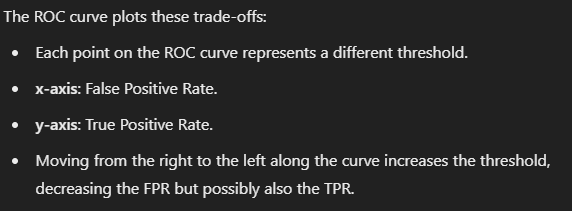


In [13]:
# Code example for AUC ROC calculation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Generate a synthetic binary dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # get the probabilities for the positive class

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

AUC: 0.9337520128824477


AUC: 0.9337520128824477


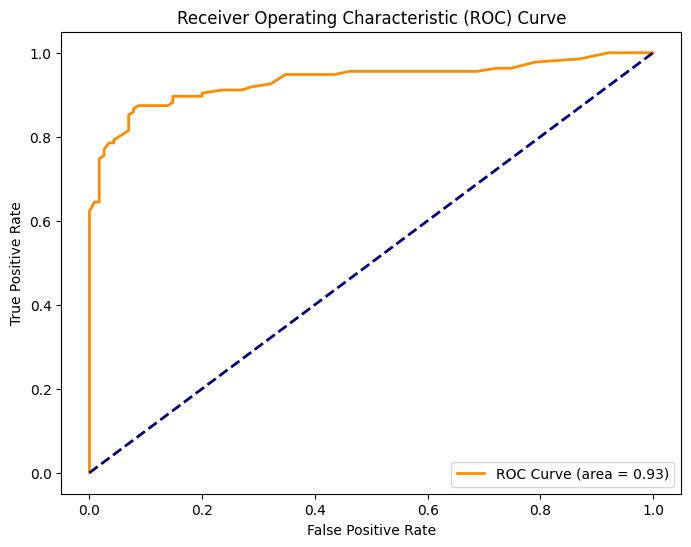

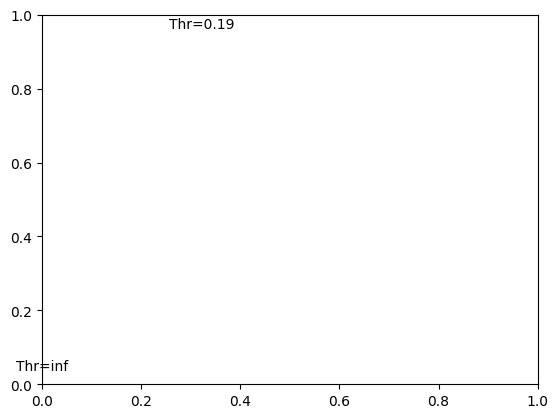

In [15]:
# Code Example of ROC curve and the tradeoff
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Generate a synthetic binary dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Optionally, annotate specific threshold values on the curve
for i in range(0, len(fpr), 50):  # Adjust the range or step to reduce clutter
    plt.annotate(f"Thr={thresholds[i]:.2f}", (fpr[i], tpr[i]), textcoords="offset points", xytext=(0,10), ha='center')


### Choosing the Best Threshold

To choose the best threshold from the ROC curve, consider the following approaches:
1. Maximize TPR while minimizing FPR: Look for a point on the curve that is closest to the top-left corner of the plot (near perfect sensitivity and specificity). This point represents a good balance between sensitivity (TPR) and specificity (1 - FPR), minimizing both false negatives and false positives.

2. Youden’s Index: This method selects the threshold that maximizes the difference between the True Positive Rate and the False Positive Rate. Mathematically, it is calculated as: 
    * J=Sensitivity+Specificity−1 This statistic will help you to find the threshold where the sum of sensitivity and specificity is maximized, which corresponds to the point on the ROC curve that is furthest north-west.

3. Cost-based approach: If there are different costs associated with false positives and false negatives, you can assign costs to them and choose a threshold that minimizes the total cost.

4. Precision-Recall Trade-off: In some cases, especially with imbalanced datasets, you might prefer to look at the precision-recall curve instead and choose a threshold that balances these two metrics according to your business needs.

In [16]:
# Assuming fpr, tpr, thresholds are from roc_curve
J = tpr - fpr  # Calculate Youden's Index for each threshold
optimal_idx = np.argmax(J)  # Find the index of the maximum Youden's Index
optimal_threshold = thresholds[optimal_idx]  # Get the corresponding threshold

print("Optimal threshold by Youden's Index:", optimal_threshold)

Optimal threshold by Youden's Index: 0.47


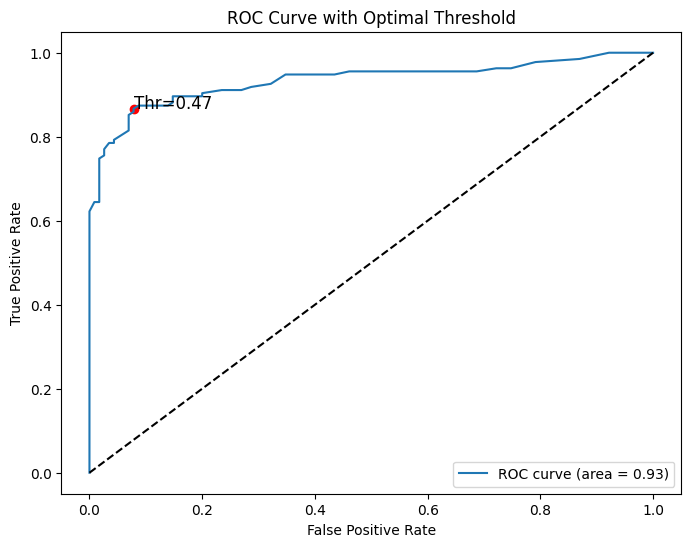

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % 0.93)
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red')  # mark the optimal point
plt.text(fpr[optimal_idx], tpr[optimal_idx], f'Thr={optimal_threshold:.2f}', fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()